# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [93]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

api_key = weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


# set up lists to hold reponse info
found_cities = []
temp = []
lat = []
lon = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each - AMBER, FIGURE OUT NUMBERING ITERATIVE REQUESTS
for city in cities:
    response = requests.get(query_url + city).json()
    time.sleep(1)
    try:
        found_cities.append(response['name'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Hey! I'm working on finding your information and I'm only at {city}")
    except NameError:
        print(f"Oops - I can't find data on {city}, I'll have to skip it")
        pass
    except KeyError:
        print(f"Oops - I can't find data on {city}, I'll have to skip it")
        pass

Hey! I'm working on finding your information and I'm only at hilo
Hey! I'm working on finding your information and I'm only at alice springs
Hey! I'm working on finding your information and I'm only at hobart
Hey! I'm working on finding your information and I'm only at chuy
Hey! I'm working on finding your information and I'm only at akyab
Hey! I'm working on finding your information and I'm only at kaitangata
Hey! I'm working on finding your information and I'm only at puerto ayora
Hey! I'm working on finding your information and I'm only at hajnowka
Hey! I'm working on finding your information and I'm only at sorong
Hey! I'm working on finding your information and I'm only at guerrero negro
Hey! I'm working on finding your information and I'm only at aswan
Hey! I'm working on finding your information and I'm only at albany
Hey! I'm working on finding your information and I'm only at lompoc
Hey! I'm working on finding your information and I'm only at lumeje
Hey! I'm working on finding

Hey! I'm working on finding your information and I'm only at saint george
Hey! I'm working on finding your information and I'm only at serebryansk
Hey! I'm working on finding your information and I'm only at bubaque
Oops - I can't find data on shchelyayur, I'll have to skip it
Hey! I'm working on finding your information and I'm only at gisborne
Hey! I'm working on finding your information and I'm only at varadero
Oops - I can't find data on leghorn, I'll have to skip it
Hey! I'm working on finding your information and I'm only at hamilton
Hey! I'm working on finding your information and I'm only at tuktoyaktuk
Hey! I'm working on finding your information and I'm only at bhanpuri
Hey! I'm working on finding your information and I'm only at chokurdakh
Hey! I'm working on finding your information and I'm only at port alfred
Hey! I'm working on finding your information and I'm only at srednekolymsk
Hey! I'm working on finding your information and I'm only at haines junction
Hey! I'm worki

Hey! I'm working on finding your information and I'm only at chimbote
Hey! I'm working on finding your information and I'm only at beisfjord
Hey! I'm working on finding your information and I'm only at verkhoyansk
Hey! I'm working on finding your information and I'm only at mehran
Hey! I'm working on finding your information and I'm only at rudnogorsk
Hey! I'm working on finding your information and I'm only at bairiki
Hey! I'm working on finding your information and I'm only at sivas
Oops - I can't find data on attawapiskat, I'll have to skip it
Hey! I'm working on finding your information and I'm only at jiaojiang
Hey! I'm working on finding your information and I'm only at paciran
Hey! I'm working on finding your information and I'm only at singkang
Hey! I'm working on finding your information and I'm only at longview
Hey! I'm working on finding your information and I'm only at aranos
Oops - I can't find data on toliary, I'll have to skip it
Hey! I'm working on finding your informat

Hey! I'm working on finding your information and I'm only at taybad
Hey! I'm working on finding your information and I'm only at lubao
Hey! I'm working on finding your information and I'm only at kathmandu
Hey! I'm working on finding your information and I'm only at san cristobal
Hey! I'm working on finding your information and I'm only at yar-sale
Hey! I'm working on finding your information and I'm only at nisia floresta
Hey! I'm working on finding your information and I'm only at karatau
Hey! I'm working on finding your information and I'm only at maridi
Hey! I'm working on finding your information and I'm only at laiyang
Hey! I'm working on finding your information and I'm only at rantepao
Oops - I can't find data on hunza, I'll have to skip it
Hey! I'm working on finding your information and I'm only at kaeo
Hey! I'm working on finding your information and I'm only at poronaysk
Hey! I'm working on finding your information and I'm only at colares
Hey! I'm working on finding your in

Hey! I'm working on finding your information and I'm only at xining
Hey! I'm working on finding your information and I'm only at harper
Hey! I'm working on finding your information and I'm only at ilek
Hey! I'm working on finding your information and I'm only at monforte de lemos
Hey! I'm working on finding your information and I'm only at srandakan
Hey! I'm working on finding your information and I'm only at ancud
Oops - I can't find data on buariki, I'll have to skip it
Hey! I'm working on finding your information and I'm only at mayo
Hey! I'm working on finding your information and I'm only at bredy
Hey! I'm working on finding your information and I'm only at liepaja
Oops - I can't find data on temaraia, I'll have to skip it
Hey! I'm working on finding your information and I'm only at manaure
Hey! I'm working on finding your information and I'm only at biak
Hey! I'm working on finding your information and I'm only at samokov
Hey! I'm working on finding your information and I'm only 

Hey! I'm working on finding your information and I'm only at sisimiut
Hey! I'm working on finding your information and I'm only at grande-synthe
Hey! I'm working on finding your information and I'm only at kissidougou
Hey! I'm working on finding your information and I'm only at batticaloa
Hey! I'm working on finding your information and I'm only at acarau
Hey! I'm working on finding your information and I'm only at trapani
Hey! I'm working on finding your information and I'm only at baishishan
Hey! I'm working on finding your information and I'm only at te anau
Hey! I'm working on finding your information and I'm only at nara
Hey! I'm working on finding your information and I'm only at fasa
Hey! I'm working on finding your information and I'm only at sambava
Hey! I'm working on finding your information and I'm only at hami
Hey! I'm working on finding your information and I'm only at port augusta
Hey! I'm working on finding your information and I'm only at moranbah
Oops - I can't find d

In [90]:

for city in cities:
    response = requests.get(query_url + city).json()
    time.sleep(1)
#     t_temp.append(response['main']['temp'])
#     t_lat.append(response['coord']['lat'])
#     t_lng.append(response['coord']['lon'])
#     t_cities.append(response['name'])
    pprint(response)


{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 19.73, 'lon': -155.09},
 'dt': 1597090715,
 'id': 5855927,
 'main': {'feels_like': 26,
          'humidity': 65,
          'pressure': 1019,
          'temp': 25.28,
          'temp_max': 28,
          'temp_min': 23.33},
 'name': 'Hilo',
 'sys': {'country': 'US',
         'id': 7881,
         'sunrise': 1597075168,
         'sunset': 1597121512,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 3.1}}


KeyboardInterrupt: 

In [92]:
print(found_cities)
print(temp)
print(lat)
print(lon)
print(humidity)
print(cloudiness)
print(wind)
print(country)
print(date)


['Hilo', 'Alice Springs', 'Hobart', 'Chui', 'Sittwe', 'Kaitangata', 'Puerto Ayora', 'Hajnówka', 'Sorong', 'Guerrero Negro', 'Aswān', 'Albany', 'Lompoc', 'Lumeje', 'Lüderitz', 'São João da Barra', 'Dunedin', 'Tuatapere', 'Sunbury', 'Airai', 'Belaya Gora', 'Cinco Esquinas', 'Zhigansk', 'Craig', 'Tiksi', 'Punta Arenas', 'Cape Town']
[28, 16, 4, 16.51, 27.69, 9.44, 25, 18.33, 25.52, 29.76, 37, 33.33, 20, 18.55, 12, 25, 7.22, 8.89, 7, 14.27, 5.9, 27, 6.81, 33, 3.75, 1, 13.33]
[19.73, -23.7, -42.88, -33.7, 20.15, -46.28, -0.74, 52.74, -0.88, 27.98, 24.09, 42.6, 34.64, -11.55, -26.65, -21.64, -45.87, -46.13, -37.58, -8.93, 68.53, 10.1, 66.77, 40.52, 71.69, -53.15, -33.93]
[-155.09, 133.88, 147.33, -53.46, 92.9, 169.85, -90.35, 23.58, 131.25, -114.06, 32.91, -73.97, -120.46, 20.78, 15.16, -41.05, 170.5, 167.68, 144.73, 125.41, 146.42, -84.17, 123.37, -107.55, 128.87, -70.92, 18.42]
[65, 29, 80, 85, 87, 62, 65, 80, 86, 41, 17, 64, 64, 28, 93, 69, 73, 83, 81, 100, 65, 69, 73, 9, 85, 86, 93]
[20,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [94]:
weather_dict = {
    "City": found_cities,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temperature": temp, 
    "Humidity": humidity,
    "Cloudiness": cloudiness, 
    "Wind Speed": wind,
    "Country": country, 
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,28.00,65,20,3.10,US,1597091250
1,Alice Springs,-23.70,133.88,16.00,29,11,5.70,AU,1597091448
2,Hobart,-42.88,147.33,4.00,80,20,3.60,AU,1597090972
3,Chui,-33.70,-53.46,16.51,85,80,2.30,UY,1597091212
4,Sittwe,20.15,92.90,27.69,87,100,3.77,MM,1597091213


In [95]:
weather_data.to_csv(r'WeatherPy_Results.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [104]:
weather_data = weather_data.sort_values("Humidity", ascending = False)
weather_data[['Latitude', 'Longitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']].describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,18.524638,21.647213,20.896631,71.162257,47.647266,3.579136
std,32.911118,90.444064,8.117841,19.776984,38.606455,2.300970
min,-54.800000,-179.170000,0.000000,3.000000,0.000000,0.260000
25%,-7.600000,-56.045000,14.710000,62.000000,4.500000,1.870000
50%,19.730000,26.830000,23.000000,76.000000,40.000000,3.100000
75%,46.485000,101.595000,27.000000,86.000000,90.000000,4.950000
max,78.220000,178.420000,38.890000,100.000000,100.000000,14.780000


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

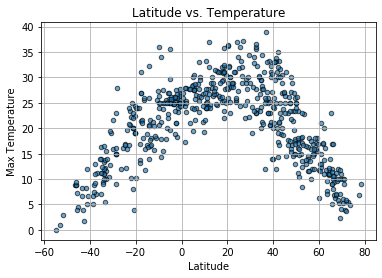

In [134]:
weather_data.plot(kind="scatter", x="Latitude", y="Max Temperature", grid=True, edgecolor='black', alpha = .65,
              title="Latitude vs. Temperature")
plt.show()

## Latitude vs. Humidity Plot

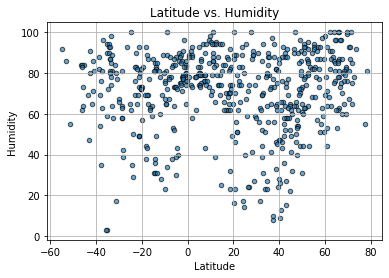

In [133]:
weather_data.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, edgecolor='black', alpha = .65,
              title="Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

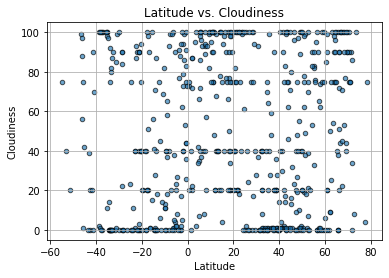

In [132]:
weather_data.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, edgecolor='black', alpha = .65,
              title="Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

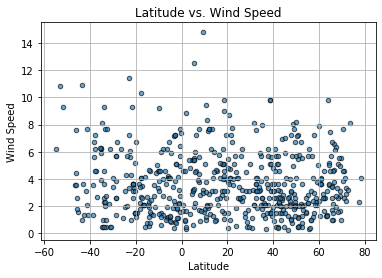

In [131]:
weather_data.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, edgecolor='black', alpha = .65,
              title="Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [275]:
# OPTIONAL: Create a function to create Linear Regression plots

def lin_regress(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, color="tomato")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))    
    plt.annotate(line_eq, (x.max()-1, y.max()-1),fontsize=15,color="firebrick")

In [265]:
# Create Northern and Southern Hemisphere DataFrames
northern_weather = weather_data.loc[weather_data["Latitude"] > 0, :]
southern_weather = weather_data.loc[weather_data["Latitude"] < 0, :]
northern_weather

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
137,Aykhal,66.00,111.50,10.00,100,90,1.0,RU,1597091611
397,Tornio,65.85,24.15,9.00,100,0,1.0,FI,1597091922
195,Klaksvík,62.23,-6.59,11.00,100,9,2.6,FO,1597091685
326,Kathmandu,27.72,85.32,22.00,100,75,1.5,NP,1597091366
278,Grindavik,63.84,-22.43,11.00,100,90,9.8,IS,1597091781
...,...,...,...,...,...,...,...,...,...
134,Riyadh,24.69,46.72,34.00,14,61,4.1,SA,1597091608
256,Winnemucca,40.97,-117.74,33.00,13,1,4.6,US,1597091756
379,Cortez,37.35,-108.59,33.00,10,1,3.6,US,1597091901
23,Craig,40.52,-107.55,33.00,9,1,3.6,US,1597091235


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

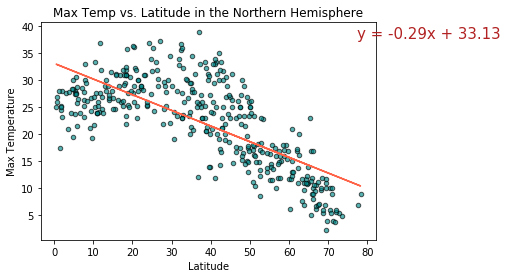

In [276]:
northern_weather.plot(kind="scatter", y="Max Temperature", x="Latitude", color = "darkcyan", edgecolor='black', alpha = .65,
              title="Max Temp vs. Latitude in the Northern Hemisphere")
lin_regress(x = northern_weather["Latitude"], y = northern_weather["Max Temperature"])
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

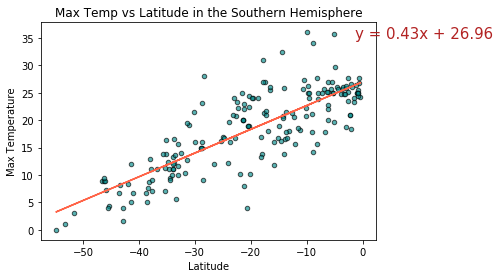

In [277]:
southern_weather.plot(kind= "scatter", x="Latitude", y="Max Temperature", color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Max Temp vs Latitude in the Southern Hemisphere")
lin_regress(x = southern_weather["Latitude"], y = southern_weather["Max Temperature"])
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

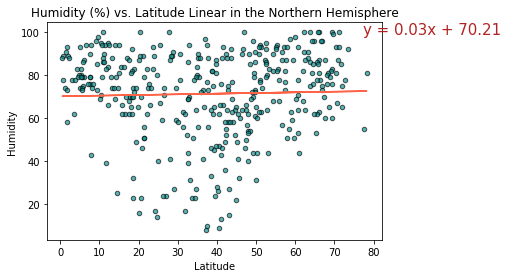

In [278]:
northern_weather.plot(kind='scatter', x = 'Latitude', y= 'Humidity', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Humidity (%) vs. Latitude Linear in the Northern Hemisphere")
lin_regress(x=northern_weather['Latitude'], y=northern_weather['Humidity'])
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

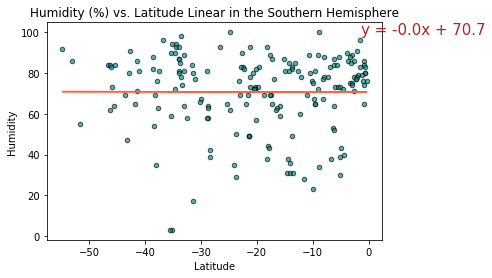

In [279]:
southern_weather.plot(kind='scatter', x = 'Latitude', y= 'Humidity', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Humidity (%) vs. Latitude Linear in the Southern Hemisphere")
lin_regress(x=southern_weather['Latitude'], y=southern_weather['Humidity'])
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

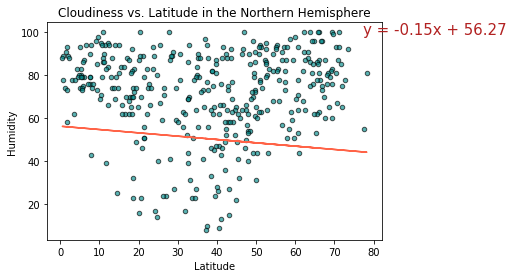

In [280]:
northern_weather.plot(kind='scatter', x = 'Latitude', y= 'Humidity', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Cloudiness vs. Latitude in the Northern Hemisphere")
lin_regress(x=northern_weather['Latitude'], y=northern_weather['Cloudiness'])
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

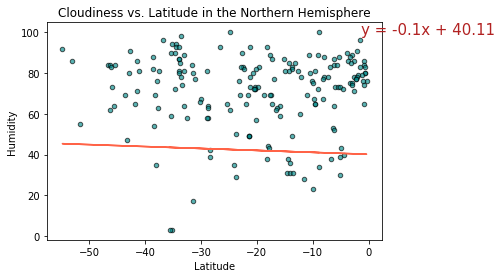

In [281]:
southern_weather.plot(kind='scatter', x = 'Latitude', y= 'Humidity', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Cloudiness vs. Latitude in the Northern Hemisphere")
lin_regress(x=southern_weather['Latitude'], y=southern_weather['Cloudiness'])
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

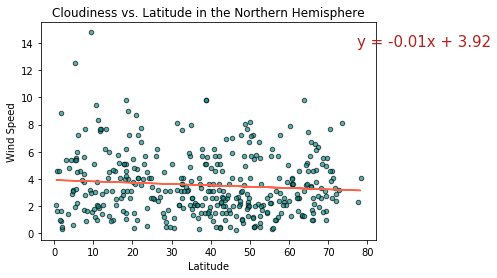

In [282]:
northern_weather.plot(kind="scatter", x='Latitude', y='Wind Speed', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Cloudiness vs. Latitude in the Northern Hemisphere")
lin_regress(x=northern_weather['Latitude'], y=northern_weather['Wind Speed'])
plt.show()                                               

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

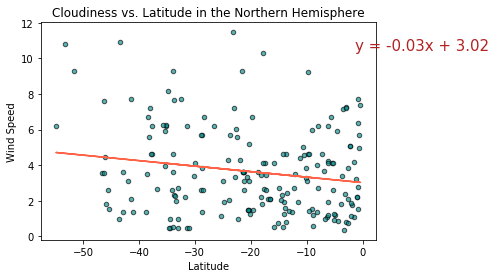

In [283]:
southern_weather.plot(kind="scatter", x='Latitude', y='Wind Speed', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Cloudiness vs. Latitude in the Northern Hemisphere")
lin_regress(x=southern_weather['Latitude'], y=southern_weather['Wind Speed'])
plt.show()        